In [1]:
from matplotlib import cm
import numpy as np 
import matplotlib.pyplot as plt

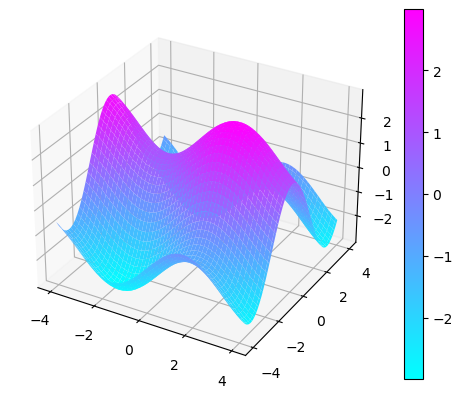

In [46]:
def f(x,y):
    return np.sin(x) + 2*np.cos(y) 

fig, ax = plt.subplots(subplot_kw={"projection":"3d"})

res = 100

x = np.linspace(-4, 4, res)
y = np.linspace(-4, 4, res)
X, Y= np.meshgrid(x,y)

Z = f(X,Y)

surf = ax.plot_surface(X, Y, Z,cmap=cm.cool)
fig.colorbar(surf)
plt.show()

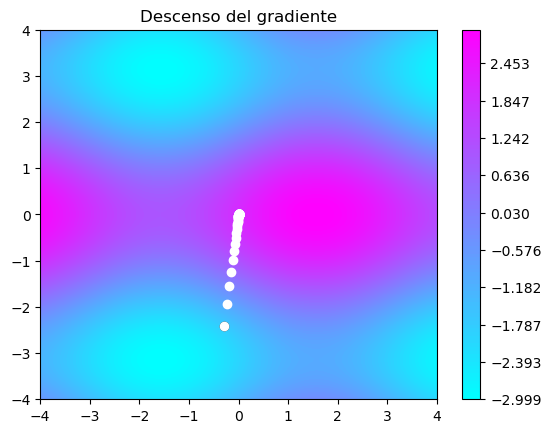

In [51]:
level_map =np.linspace(np.min(Z),np.max(Z),res)
plt.contourf(X,Y,Z,level_map, cmap=cm.cool)
plt.colorbar()
plt.title("Descenso del gradiente")

p =np.random.rand(2) * 8 - 4
plt.plot(p[0], p[1], 'o', c='k')# Inserting the gradient descent algorithm

def gradient(x, y):
    return np.array([2*x, 2*y])

lr = 0.1 # learning rate
num_steps = 1000

path = np.zeros((num_steps, 2))
path[0, :] = p

for i in range(num_steps-1):
    p = p - lr * gradient(p[0], p[1])
    path[i+1, :] = p

plt.plot(path[:,0], path[:,1], 'o', c='w')

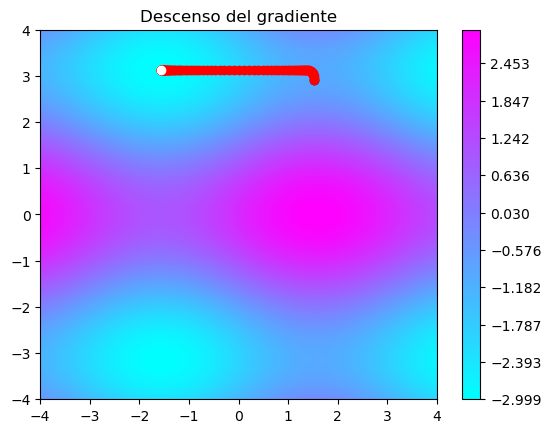

In [61]:
level_map =np.linspace(np.min(Z),np.max(Z),res)
plt.contourf(X,Y,Z,level_map, cmap=cm.cool)
plt.colorbar()
plt.title("Descenso del gradiente")

p =np.random.rand(2) * 8 - 4
plt.plot(p[0], p[1], 'o', c='k')

h = 0.01
lr = 0.01

def derivate(cp, p ,h):
    return (f(cp[0], cp[1]) - f(p[0], p[1])) / h


def gradiante(p):
    grad = np.zeros(2)
    for idx, valor in enumerate(p):
        cp = np.copy(p)
        cp[idx] = cp[idx] + h 

        dp = derivate(cp, p, h)
        grad[idx] = dp

    return grad

for i in range(1000):
    p = p - lr*gradiante(p)
    if(i % 10 == 0):
        plt.plot(p[0], p[1], 'o', c='r')

plt.plot(p[0], p[1], 'o', c='w')

